# Machine Learning Online Class - Optional Exercise 1
Linear regresion with multiple variables. <br />
Housing prices in Portland, Oregon. Predict the price of a house as a function of its size and number of bedrooms. 

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)

In [202]:
data = pd.read_csv("ex1data2.txt")
data.columns = ['size','bedrooms','price']
data.head()

,size,bedrooms,price
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900


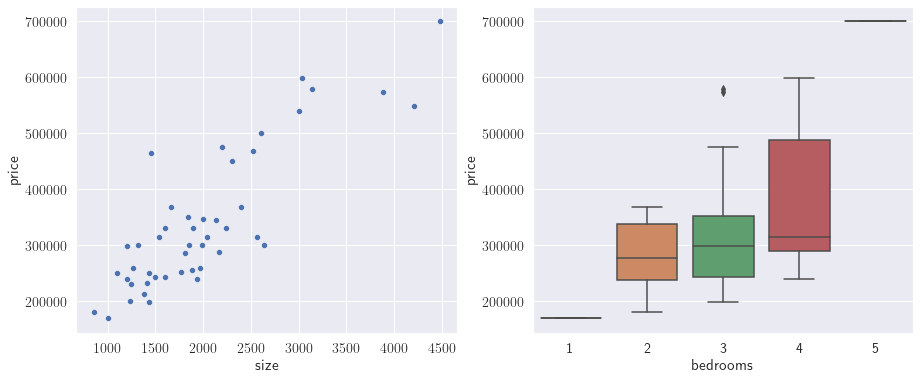

In [203]:
fig0, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 6))
sns.scatterplot(data=data, ax=ax1, x='size', y='price')
sns.boxplot(data=data, ax=ax2, x='bedrooms', y='price')

## ================ Part 1: Feature Normalization ================

In [204]:
#Normalize a feature to mean 0 and stdev 1.
#For each feature:
#-Find the mean and substract it from dataset.
#-Compute the stdev and divide each feature by it
def featureNormalize(df):
    norm = pd.DataFrame()
    for feat in df:
        norm[[feat]]=df[[feat]].apply(lambda x: (x-x.mean())/x.std())
    return norm

In [205]:
ndata = featureNormalize(data)
#Add intercept column
ndata.insert(0, 'x0', [1 for i in range(len(ndata.index))])
ndata.head()

,x0,size,bedrooms,price
0,1,-0.495977,-0.226166,-0.073110
1,1,0.499874,-0.226166,0.236953
2,1,-0.725023,-1.526618,-0.849457
3,1,1.246762,1.074287,1.592190
4,1,-0.016724,1.074287,-0.311010


## ================ Part 2: Gradient Descent ================

Cost function:
$$J(\vec{\theta})=\frac{1}{2m}\left(\vec{y}-X\cdot\vec{\theta}\right)^T\cdot\left(\vec{y}-X\cdot\vec{\theta}\right)$$
Gradient:
$$\frac{\partial J}{\partial\theta_k}=-\frac{1}{m}\vec{x}_k^T\cdot\left(\vec{y}-X\cdot\vec{\theta}\right)$$
Gradient descent:
$$\theta_k=\theta_k-\alpha\frac{\partial J}{\partial\theta_k}$$

In [206]:
#Cost funtion J
def J(X, y, theta):
    v1 = y-np.matmul(X,theta)
    return np.matmul(v1.T,v1)[0][0]/(2*len(y))

#Gradient of J
def grad_J(X, y, theta):
    v1 = y-np.matmul(X,theta)
    grad = []
    for k in range(X.shape[1]):
        tcol = X[:,k] #k column as 1d array (row vector)
        grad.append(np.matmul(tcol,v1))
    return -np.asarray(grad)/len(y)

#gradient descent
def grad_desc(alpha, X, y, epochs, iprint):
    epoch = []
    history = []
    #Initializa parameter vector (fitting parameters)
    theta = np.zeros((X.shape[1],1))
    for e in range(epochs):
        theta = theta - alpha*grad_J(X,y,theta)
        if e%iprint == 0:
            #print(theta, J(X,y,theta))
            epoch.append(e)
            history.append(J(X,y,theta))
    return theta, epoch, history

In [207]:
#Extract matrix X and convert to array
X = ndata.iloc[:,0:ndata.shape[1]-1].to_numpy()
#Extract vector y as a column vector
y = ndata.iloc[:,ndata.shape[1]-1].to_numpy()[np.newaxis].T #create a new axis to convert a 1d array to 2d and transpose
#X,y

In [208]:
#Choose some alpha value
alpha = 0.01;
num_iters = 1500;

#Run gradient descent
theta, it, histo = grad_desc(alpha, X, y, num_iters, 10)

Text(0, 0.5, 'J')

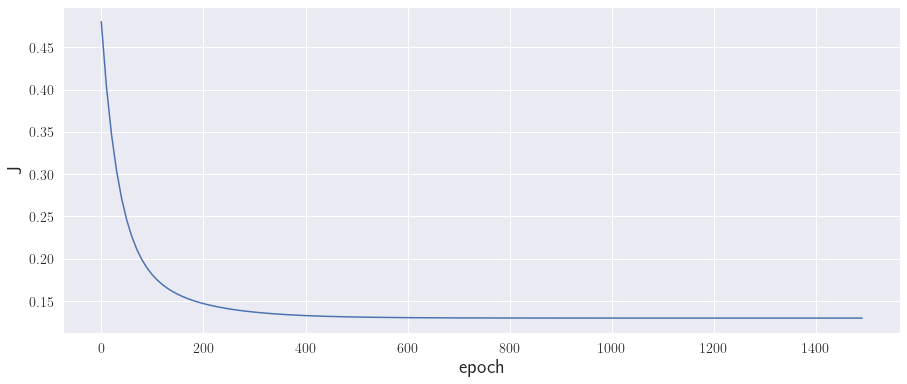

In [209]:
#Plot cost gradient descent convergence
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(it,histo)
ax.set_xlabel('epoch',fontsize=20)
ax.set_ylabel('J',fontsize=20)

In [210]:
print("Theta computed from gradient descent: ({0}, {1}, {2})".format(theta[0][0],theta[1][0],theta[2][0]))

Theta computed from gradient descent: (5.899869964556951e-17, 0.8832005264217165, -0.04918545179692997)


In [211]:
#Normalize size=1650 and bedrooms=3, compute and de-normalize price
f1 = (1650-data['size'].mean()) / data['size'].mean()
f2 = (3-data['bedrooms'].mean()) / data['bedrooms'].mean()
pr = (theta[0][0]+theta[1][0]*f1+theta[2][0]*f2) * data['price'].std() + data['price'].mean()
print("Predicted price of a 1650 sq-ft, 3 br house (grad. desc.): ${0:.3f}".format(pr))

Predicted price of a 1650 sq-ft, 3 br house (grad. desc.): $320040.727


 ##  ================ Part 3: Normal Equations ================

The closed for solution for the linear regression problem is obtained by equating $\nabla_{\theta}J=0$ and solving for $\vec{\theta}$:
$$\vec{\theta}=\left(X^TX\right)^{-1}X^T\vec{y}$$

In [214]:
#Solve the normal equation
invXX = np.linalg.inv(np.matmul(X.T,X))
THETA = np.matmul(np.matmul(invXX, X.T), y)

In [213]:
print("Theta computed from normal equations: ({0}, {1}, {2})".format(THETA[0][0],THETA[1][0],THETA[2][0]))

Theta computed from normal equations: (6.245004513516506e-17, 0.8839346324815558, -0.04991955777801018)
